#### Importing the necessary libraries

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error

#### loading the dataset

In [2]:
df = pd.read_csv('zoo.csv')
df.head(5)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


#### Extracting the features and target

In [3]:
df_Y = df['class_type']
df_X = df.iloc[:,1:-1]

#### Plot a Dendrogram

Text(0, 0.5, 'Euclidean distance in the space with other variables')

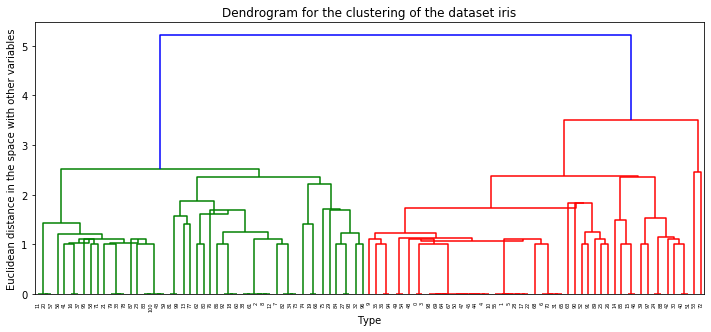

In [4]:
Z = sch.linkage(df_X, method = 'median')
plt.figure(figsize=(12,5))
den = sch.dendrogram(Z)
plt.title('Dendrogram for the clustering of the dataset iris')
plt.xlabel('Type')
plt.ylabel('Euclidean distance in the space with other variables')

#### Fitting the Model

In [5]:
ac = AgglomerativeClustering(n_clusters=7)
model = ac.fit(df_X)
model

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=7)

In [6]:
model.labels_

array([1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 3, 2, 6, 0, 0, 3, 1, 2, 2, 3, 3,
       1, 3, 0, 5, 5, 4, 1, 4, 0, 1, 4, 3, 2, 1, 1, 3, 2, 0, 0, 3, 0, 3,
       1, 1, 0, 1, 1, 1, 1, 0, 5, 0, 1, 1, 3, 3, 3, 3, 2, 2, 6, 5, 1, 1,
       2, 1, 1, 1, 1, 3, 0, 2, 2, 4, 6, 6, 3, 3, 6, 6, 2, 3, 4, 0, 2, 3,
       0, 5, 5, 5, 2, 4, 1, 3, 4, 0, 1, 6, 3], dtype=int64)

In [7]:
print(np.unique(model.labels_))
print(np.unique(df_Y))

[0 1 2 3 4 5 6]
[1 2 3 4 5 6 7]


In [8]:
df_Y = df_Y-1

#### Calculating the error

In [9]:
score = mean_squared_error(df_Y,model.labels_)
abs_error = np.sqrt(score)
abs_error

2.7395164710308832

Text(0.5, 15.0, 'Predicted label')

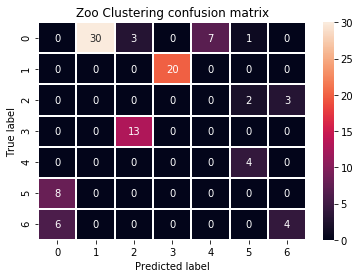

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cfm = confusion_matrix(df_Y, model.labels_)
sns.heatmap(cfm, annot = True,  linewidths=1)
plt.title('Zoo Clustering confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')